# Hands On Session: Autoencoders and Machine Learning
## By: Sabera Talukder

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SaberaTalukder/Chen_Institute_DataSAI_for_Neuroscience/blob/main/07_08_22_day4_autoencoders_and_ML_introduction/code/solutions/solutions_neural_autoencoders.ipynb)

In [1]:
# All Imports - alphabetically ordered with shortcuts
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

from scipy.io import loadmat
from sklearn.decomposition import PCA
from torch.utils.data import Dataset, DataLoader

SEED = 38
np.random.seed(SEED)
_ = torch.random.manual_seed(SEED)

In [27]:
# # uncomment code below to pull directly from github
# !wget https://raw.githubusercontent.com/SaberaTalukder/Chen_Institute_DataSAI_for_Neuroscience/main/07_05_22_day1_overview/data/hypothalamus_calcium_imaging_remedios_et_al.mat?raw=true
# !mv hypothalamus_calcium_imaging_remedios_et_al.mat\?raw\=true hypothalamus_calcium_imaging_remedios_et_al.mat

# hypothalamus_data = loadmat('hypothalamus_calcium_imaging_remedios_et_al.mat')

# # if doing it locally
# path = '/Users/A*****/Desktop/sabera_chen/Chen_Institute_DataSAI_for_Neuroscience/07_08_22_day4_autoencoders_and_ML_introduction/data/'
# hypothalamus_data = loadmat(path + 'hypothalamus_calcium_imaging_remedios_et_al.mat')

## Throwback!! 😎😎😎 This is the same neural data that we worked with on our first day!
#### Since you know so much about it please pull out the neural data array from they hypothalamus data!

In [ ]:
# Enter Code Here:

In [3]:
# Solution:
neural_data = hypothalamus_data['neural_data']
print(neural_data.shape)

(115, 18561)


## Now shorten this array, and for every neuron take only the first 1000 time steps
#### Hint: You should be able to do this in one line of code

In [ ]:
# Enter Code Here:

In [4]:
# Solution:
neural_data_short = neural_data[:, 0:1000]
print(neural_data_short.shape)

(115, 1000)


## Now run PCA to 2D on the shortened neural data, color according to time!
#### Hint: It's very similar to the dimensionality reduction code from the first day, but you're only doing it on 1000 time step data

In [ ]:
# Enter Code Here:

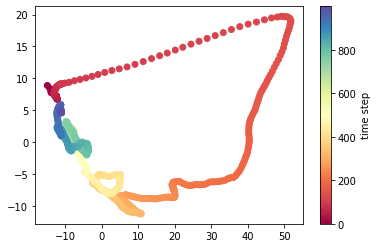

In [5]:
# Solution:

# Train PCA
pca_model_s_2 = PCA(n_components=2)
neural_pca_s_2 = pca_model_s_2.fit_transform(neural_data_short.T)

pc1 = neural_pca_s_2[:, 0]
pc2 = neural_pca_s_2[:, 1]

# Do the plotting for 2d
time_varying_color = np.arange(0, pc1.shape[0], 1)
_ = plt.scatter(pc1, pc2, c=time_varying_color, cmap='Spectral')
cbar = plt.colorbar()
cbar.set_label('time step')
_ = plt.show()

# Now, I'm going to give you the code for the custom dataset class, but I'm going to ask you questions so read each line in depth!

### A custom dataset class allows us to load our data into a pytorch data loader. This is important when building pytorch models!

In [6]:
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        instance = self.data[idx, :]
        sample = {"data": instance}
        return sample

### Because we are dealing with pytorch, it's best to pass in our data as a tensor of floats.
#### A float is a 'floating-point number', it's just a number with decimals out to some level of precision. 
#### A tensor is a container that stores data in N dimensions. A matrix is a special case of a tensor that is 2D.

In [7]:
neural_data_float_tensor = torch.tensor(neural_data_short).float()

#### What is the shape of our tensor of floats?

In [ ]:
# Enter Code Here:

In [8]:
# Solutions:
print(neural_data_float_tensor.shape)

torch.Size([115, 1000])


## Now apply the CustomDataset class to our neural data tensor!

In [ ]:
# Enter code here:

In [9]:
# Solutions:
neural_dataset_tensor = CustomDataset(neural_data_float_tensor)

## What happens if you call __len__() on the data? What does this length represent?

In [ ]:
# Enter code here:

In [10]:
# Solutions:
neural_dataset_tensor.__len__()
# length represents the number of neurons

115

## How about __getitem__(idx)? What is the idx variable that __getitem__() is indexing? 

In [ ]:
# Enter code here:

In [11]:
# Solutions:
print(neural_dataset_tensor.__getitem__(0).keys())
print(neural_dataset_tensor.__getitem__(0)['data'].shape)
print('')
print(neural_dataset_tensor.__getitem__(114).keys())
print(neural_dataset_tensor.__getitem__(114)['data'].shape)

# getitem has 115 (number of neurons) dictionaries, where the key is ['data'], then the shape is 1000 this corresponds to 1000 time points.

dict_keys(['data'])
torch.Size([1000])

dict_keys(['data'])
torch.Size([1000])


## Now we are going to break our data into a train (90% of the data) and test (10% of the data) split

#### How many neurons should be in the train set? How about the test set?

In [ ]:
# Enter code here:

In [12]:
# Solutions:
train_size = int(np.floor(0.9 * len(neural_dataset_tensor)))
test_size = len(neural_dataset_tensor) - train_size
print(train_size, test_size)

103 12


## Now using the torch.utils.data.random_split() function split the data into a train set and a test set
#### Hint: Google is your friend 🤗
#### Hint Hint: You should be able to do this in one line of code 😱

In [ ]:
# Enter code here:

In [13]:
# Solutions:
train_dataset, test_dataset = torch.utils.data.random_split(neural_dataset_tensor, [train_size, test_size])

## Now using the torch.utils.data.DataLoader() make a train data loader and a test data loader.
#### Make sure to use the dataset, batch_size, and shuffle parameters when you call the function.
#### For simplicity, set the batch size to be larger than all the data you have. This isn't practical for large datasets, but with our small data it will work great!

In [ ]:
# Enter code here:

In [14]:
# Solutions:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=150, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=150, shuffle=True)

## Enumerate through your train_loader and test loader is the index, and data what you expect to see?
#### Hint: Enumerate is an important word!

In [ ]:
# Enter code here:

In [15]:
# Solutions:
for idx, data in enumerate(train_loader):
    print(idx, data['data'].shape)

print('')

for idx, data in enumerate(test_loader):
    print(idx, data['data'].shape)

0 torch.Size([103, 1000])

0 torch.Size([12, 1000])


# Woot Woo!! Nicely Done 😎 Now we're going to build our very first neural network!

### There are 3 steps! Make sure to do them all!

In [16]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        # Implementing a linear encoder.
        # Each layer is composed of a linear layer followed by a Relu activation function.
        # The last layer is just a linear layer!
        # We take a data point from a dimension of 1000, to 100, to 10, to 4.
        
        self.encoder = torch.nn.Sequential(
            # STEP 1: Enter code here
        )
          
        # Implementing a linear decoder.
        # Each layer is composed of a linear layer followed by a Relu activation function.
        # The last layer is just a linear layer!
        # We take a data point from a dimension of 4, to 10, to 100, to 1000.
        self.decoder = torch.nn.Sequential(
            # STEP 2: Enter code here
        )
        
    # You first want to pass your input data through the encoder. This creates an embedding.
    # You then want to pass this embedding through your decoder. This creates your reconstruction.
    # You then wan your forward function to return your reconstruction.
    def forward(self, x):
        # STEP 3: Enter code here
        return reconstruction

In [17]:
# Solutions:

class Autoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        # Implementing a linear encoder.
        # Each layer is composed of a linear layer followed by a Relu activation function.
        # The last layer is just a linear layer!
        # We take a data point from a dimension of 1000, to 100, to 10, to 4.
        
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(1000, 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100, 10),
            torch.nn.ReLU(),
            torch.nn.Linear(10, 4)
        )
          
        # Implementing a linear decoder (as opposed to a convolutional decoder, etc.).
        # Decoder is composed of a linear layer followed by a Relu activation function, repeated several times.
        # We take a data point from a dimension of 4 and transform it back up to size 1000.
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(4, 10),
            torch.nn.ReLU(),
            torch.nn.Linear(10, 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100, 1000),
        )
  
    def forward(self, x):
        embedding = self.encoder(x)
        reconstruction = self.decoder(embedding)
        return reconstruction

# Amazing work! Now that you've built an autoencoder, let's train it!

In [ ]:
# Enter Code Here:

# Training Parameters
epochs = 5
outputs = []
losses = []
validation_outputs = []
validation_losses = []

# Model Initialization
model = Autoencoder()
# Using Mean-Squared-Error MSE Loss function
loss_function = torch.nn.MSELoss()
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2, weight_decay = 1e-8)
# learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=1, gamma=0.98)

# ----------------------------------------------

for epoch in range(epochs):
    # training on train set
    model.train()
    
    # Loop through your training data
    for batch_idx, batch in enumerate(train_loader):
        # STEP 1: pull out the data from your batch        
        # STEP 2: get the reconstructed data from the Autoencoder Output
        # STEP 3: calculate the loss function between the reconstrucion and original data
        
        # set gradients to zero
        optimizer.zero_grad()
        # the gradient is computed and stored
        loss.backward()
        # perform the parameter update
        optimizer.step()
        # Storing the losses in a list for plotting
        losses.append(float(loss.detach()))
       
    # put model into evaluation mode
    model.eval()
    # loop through your testing/validation data
    for validation_batch_idx, validation_batch in enumerate(test_loader):
        pass
        # STEP_4: pull out the data from your validation batch
        # STEP 5: get the reconstructed data from the Autoencoder Output
        # STEP 6: calculate the loss function between the reconstrucion and original data        
        # STEP 7: append the validation losses to the validation loss list
        
    # STEP 8: append the outputs to the train outputs lists in the form of:
    # (epochs, original data, reconstruction). Don't forget to transform your tensors into numpy arrays!!!
    
    # STEP 9: append the outputs to the validation outputs lists in the form of:
    # (epochs, original data, reconstruction). Don't forget to transform your tensors into numpy arrays!!!    

    print('Finished Epoch: ', epoch)

In [18]:
# Solution:

# Training Parameters
epochs = 249
outputs = []
losses = []
validation_outputs = []
validation_losses = []

# Model Initialization
model = Autoencoder()
# Using Mean-Squared-Error MSE Loss function
loss_function = torch.nn.MSELoss()
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2, weight_decay = 1e-8)
# learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=1, gamma=0.98)

# ----------------------------------------------

for epoch in range(epochs):
    # training on train set
    model.train()
    
    # Loop through your training data
    for batch_idx, batch in enumerate(train_loader):
        # STEP 1: pull out the data from your batch
        batch_data = batch['data']
        
        # STEP 2: get the reconstructed data from the Autoencoder Output
        reconstructed = model(batch_data)

        # STEP 3: calculate the loss function between the reconstrucion and original data
        loss = loss_function(reconstructed, batch_data)

        # set gradients to zero
        optimizer.zero_grad()
        # the gradient is computed and stored
        loss.backward()
        # perform the parameter update
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(float(loss.detach()))
       
    # put model into evaluation mode
    model.eval()
    # loop through your testing/validation data
    for validation_batch_idx, validation_batch in enumerate(test_loader):
        # STEP_4: pull out the data from your validation batch
        validation_batch_data = validation_batch['data']
        
        # STEP 5: get the reconstructed data from the Autoencoder Output
        reconstructed_validation = model(validation_batch_data)
        
        # STEP 6: calculate the loss function between the reconstrucion and original data
        val_loss = loss_function(reconstructed_validation, validation_batch_data)
        
        # STEP 7: append the validation losses to the validation loss list
        validation_losses.append(float(val_loss.detach()))
    
    # STEP 8: append the outputs to both the validataion and train outputs lists in the form of:
    # (epochs, original data, reconstruction). Don't forget to transform your tensors into numpy arrays!!!
    validation_outputs.append((epochs, validation_batch_data.detach().numpy(), reconstructed_validation.detach().numpy())) 
    outputs.append((epochs, batch_data.detach().numpy(), reconstructed.detach().numpy()))
    

    print('Finished Epoch: ', epoch)

Finished Epoch:  0
Finished Epoch:  1
Finished Epoch:  2
Finished Epoch:  3
Finished Epoch:  4
Finished Epoch:  5
Finished Epoch:  6
Finished Epoch:  7
Finished Epoch:  8
Finished Epoch:  9
Finished Epoch:  10
Finished Epoch:  11
Finished Epoch:  12
Finished Epoch:  13
Finished Epoch:  14
Finished Epoch:  15
Finished Epoch:  16
Finished Epoch:  17
Finished Epoch:  18
Finished Epoch:  19
Finished Epoch:  20
Finished Epoch:  21
Finished Epoch:  22
Finished Epoch:  23
Finished Epoch:  24
Finished Epoch:  25
Finished Epoch:  26
Finished Epoch:  27
Finished Epoch:  28
Finished Epoch:  29
Finished Epoch:  30
Finished Epoch:  31
Finished Epoch:  32
Finished Epoch:  33
Finished Epoch:  34
Finished Epoch:  35
Finished Epoch:  36
Finished Epoch:  37
Finished Epoch:  38
Finished Epoch:  39
Finished Epoch:  40
Finished Epoch:  41
Finished Epoch:  42
Finished Epoch:  43
Finished Epoch:  44
Finished Epoch:  45
Finished Epoch:  46
Finished Epoch:  47
Finished Epoch:  48
Finished Epoch:  49
Finished E

## What is the difference between the training loop and the validation loop?

In [ ]:
# Enter answer here

In [ ]:
# Solution: We don't update the parameters! That's why we set the model to evaluation mode!

## What is the length of your ouputs? What does this correspond to?

In [ ]:
# Enter code here?

In [19]:
# Solutions:
print(len(outputs))
# corresponds to the number of epochs

249


## For the last epoch, what are each of items in that tuple?

In [ ]:
# Enter code here:

In [20]:
# Solutions:
print(outputs[-1][0]) # epoch number
print(outputs[-1][-1].shape) # original data
print(outputs[-1][-2].shape) # reconstructed data

249
(103, 1000)
(103, 1000)


## For the last epoch, and a neuron (you pick the number) plot the original data time series and the reconstruction time series for the training data

In [ ]:
# Enter code here:

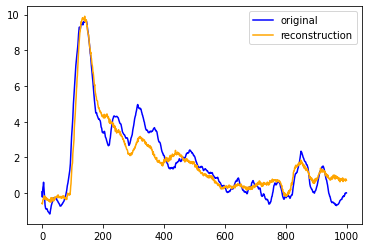

In [21]:
# Solutions:
epoch_idx = -1
neuron_idx = 80
_ = plt.plot(outputs[epoch_idx][1][neuron_idx, :], color='blue')
_ = plt.plot(outputs[epoch_idx][2][neuron_idx, :], color='orange')
_ = plt.legend(['original', 'reconstruction'])

## For the last epoch and all the neurons at once, plot the original training data and the reconstructed training data. How do you think it looks?
#### Hint: This of this represenation as an image!

In [ ]:
# Enter code here:

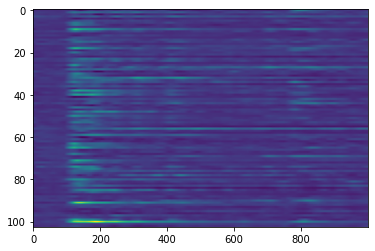

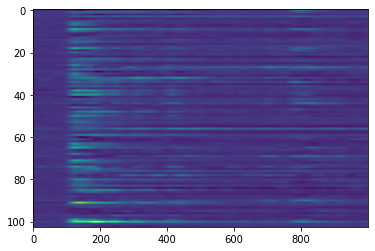

In [22]:
# Solutions:
_ = plt.imshow(outputs[-1][1], aspect='auto') # original
_ = plt.show()
_ = plt.imshow(outputs[-1][2], aspect='auto') # reconstruction

## For the last epoch and all the neurons at once, plot the original testing data and the reconstructed testing data. How do you think it looks?
#### Hint: This of this represenation as an image!

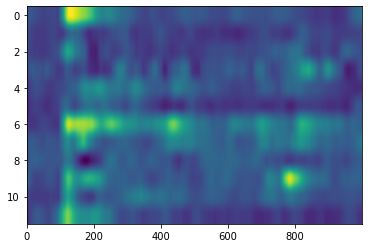

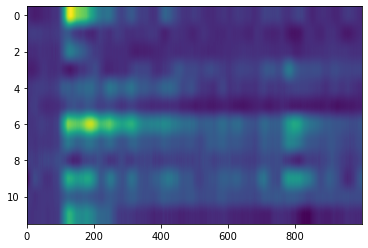

In [23]:
_ = plt.imshow(validation_outputs[-1][1], aspect='auto') # original
_ = plt.show()
_ = plt.imshow(validation_outputs[-1][2], aspect='auto') # reconstruction

## Plot the loss curves for the training and validation on top of one another in two different colors! Given what we've learned about loss curves, is the model done training? has it overfitted?

## Retrain your network until you think the model has trained properly (i.e. not underfitting, not overfitting, just right 😊. Write down the 3 epoch values! One for underfitting, one for overfitting, and one for just right!

In [ ]:
# Enter Code Here:

114


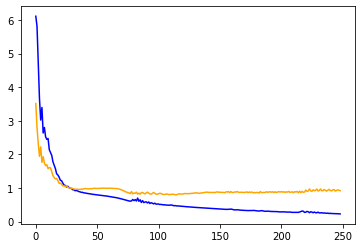

In [24]:
# Solutions:
_ = plt.plot(losses, color='blue')
_ = plt.plot(validation_losses, color='orange')

print(np.argmin(validation_losses))
# The model is trained properly around 80 epochs (by argmin). Any # of epochs below is underfitting, any # of epochs above is overfitting!

# 🛑✋ STOP ✋🛑 only once you've trained your model propely should you continue onto the next section!

## Now visualize your trained original data and trained reconstructions on the same plot with 2D PCA

In [ ]:
# Enter code here:

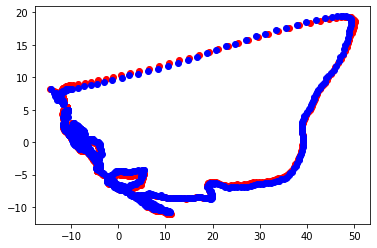

In [25]:
train_original_data = outputs[-1][1]
train_reconstructed_data = outputs[-1][2]

# Train PCA
pca_model_train_od = PCA(n_components=2)
neural_pca_train_od = pca_model_train_od.fit_transform(train_original_data.T)

pca_model_train_rd = PCA(n_components=2)
neural_pca_train_rd = pca_model_train_rd.fit_transform(train_reconstructed_data.T)

# Plot original train data and train reconstructions
_ = plt.scatter(neural_pca_train_od[:, 0], neural_pca_train_od[:, 1], color='red')
_ = plt.scatter(neural_pca_train_rd[:, 0], neural_pca_train_rd[:, 1], color='blue')

## Now visualize your test original data and test reconstructions on the same plot with 2D PCA

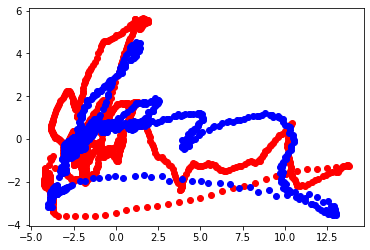

In [26]:
test_original_data = validation_outputs[-1][1]
test_reconstructed_data = validation_outputs[-1][2]

# Test PCA
pca_model_test_od = PCA(n_components=2)
neural_pca_test_od = pca_model_test_od.fit_transform(test_original_data.T)

pca_model_test_rd = PCA(n_components=2)
neural_pca_test_rd = pca_model_test_rd.fit_transform(test_reconstructed_data.T)

# Plot original train data and train reconstructions
_ = plt.scatter(neural_pca_test_od[:, 0], neural_pca_test_od[:, 1], color='red')
_ = plt.scatter(neural_pca_test_rd[:, 0], neural_pca_test_rd[:, 1], color='blue')

# Do you notice anything interesting about these plots?

In [ ]:
# Solution: the reconstructed test data doesn't look as similar to the original test data, as the reconstructed train data does to the original. This is as expected, because we don't train on the test data!